In [ ]:
import pandas as pd

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/Normal_data.csv")
data2 = pd.read_csv("/content/drive/MyDrive/metasploitable-2.csv")
data3 = pd.read_csv("/content/drive/MyDrive/OVS.csv")

In [ ]:
data = pd.concat([data1,data2],ignore_index = True)

In [ ]:
data = pd.concat([data,data3], ignore_index= True)
data.shape

(343889, 84)

In [ ]:
print("Distribution of data :")
print('---------------------------------')
print(data['Label'].value_counts())
print(data.shape)

Distribution of data :
---------------------------------
Probe         98129
DDoS          73529
Normal        68424
DoS           53616
DDoS          48413
BFA            1405
Web-Attack      192
BOTNET          164
U2R              17
Name: Label, dtype: int64
(343889, 84)


In [ ]:
del data1
del data2
del data3

In [ ]:
for col in data.columns:
  if data[col].dtype == 'object':
    unique_value = data[col].unique()
    print("featuer {} has {} unique values".format(col, len(unique_value)))

featuer Flow ID has 234971 unique values
featuer Src IP has 122868 unique values
featuer Dst IP has 1081 unique values
featuer Timestamp has 1392 unique values
featuer Label has 9 unique values


In [ ]:
print(data.shape)
print('------------')
data = data.drop(labels = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp'] , axis = 1)
print(data.shape)

(343889, 84)
------------
(343889, 80)


In [ ]:
for col in data.columns:
  if data[col].dtype == 'object':
    unique_value = data[col].unique()
    print("featuer {} has {} unique values".format(col, len(unique_value)))

featuer Label has 9 unique values


In [ ]:
Label = data['Label']
new_label = Label.replace({'Normal':0 , 'DDoS':1, 'DDoS ':1, 'Probe':2, 'DoS':3,
                           'BFA':4, 'Web-Attack':5, 'BOTNET':6, 'U2R':7})
data['Label'] = new_label

del Label
del new_label

In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.20, random_state=7)

data = x_train.join(y_train)
print(data.shape)

del x
del y

(275111, 80)


In [ ]:
Normal = [1,2,3,4,5,6,7]
DDos = [0,2,3,4,5,6,7]
Probe = [0,1,3,4,5,6,7]
Dos = [0,1,2,4,5,6,7]
BFA = [0,1,2,3,5,6,7]
Web = [0,1,2,3,4,6,7]
Botnet = [0,1,2,3,4,5,7]
U2R = [0,1,2,3,4,5,6]

Normal = data[~data['Label'].isin(Normal)]
Probe = data[~data['Label'].isin(Probe)]
Dos = data[~data['Label'].isin(Dos)]
DDos = data[~data['Label'].isin(DDos)]
BFA = data[~data['Label'].isin(BFA)]
Web = data[~data['Label'].isin(Web)]
Botnet = data[~data['Label'].isin(Botnet)]
U2R = data[~data['Label'].isin(U2R)]

print('Number of Normal ==> ', Normal.shape[0])
print('Number of DDos ==> ', DDos.shape[0])
print('Number of Probe ==> ', Probe.shape[0])
print('Number of Dos ==> ', Dos.shape[0])
print('Number of BFA ==> ', BFA.shape[0])
print('Number of Web ==> ', Web.shape[0])
print('Number of Botnet ==> ', Botnet.shape[0])
print('Number of U2R ==> ', U2R.shape[0])

Number of Normal ==>  54657
Number of DDos ==>  97383
Number of Probe ==>  78642
Number of Dos ==>  43006
Number of BFA ==>  1127
Number of Web ==>  143
Number of Botnet ==>  141
Number of U2R ==>  12


In [ ]:
def convert_to_txt_file(data, out_file):
    
    data = data.values
    file = open(out_file,'w')
    
    features = ['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label']

    for row in data:
        
        for i in range(len(features)):
            file.write(str(features[i]) + '=' + str(str(row[i])+','))
        file.write('\n')    
    file.close()


convert_to_txt_file(Normal,'/content/drive/MyDrive/Normal.txt')
convert_to_txt_file(DDos,'/content/drive/MyDrive/DDos.txt')
convert_to_txt_file(Probe,'/content/drive/MyDrive/Probe.txt')
convert_to_txt_file(Dos,'/content/drive/MyDrive/Dos.txt')
convert_to_txt_file(BFA,'/content/drive/MyDrive/BFA.txt')
convert_to_txt_file(Web,'/content/drive/MyDrive/Web.txt')
convert_to_txt_file(Botnet,'/content/drive/MyDrive/Botnet.txt')
convert_to_txt_file(U2R,'/content/drive/MyDrive/U2R.txt')

In [ ]:
del Normal 
del Probe 
del Dos 
del DDos 
del BFA 
del Web 
del Botnet 
del U2R 

In [ ]:
def Read_Data(filename, delimiter=','):
    data = {}
    trans = 0
    f = open(filename, 'r', encoding="utf8")
    for row in f:
        trans += 1
        for item in row.split(delimiter):
            if item not in data:
                data[item] = set()
            data[item].add(trans)
    f.close()
    data.pop("\n",None)
    data.pop("",None)
    return data

Data_Normal = Read_Data('/content/drive/MyDrive/Normal.txt', ',') #change the delimiter based on your input file
Data_DDos = Read_Data('/content/drive/MyDrive/DDos.txt', ',') #change the delimiter based on your input file
Data_Probe = Read_Data('/content/drive/MyDrive/Probe.txt', ',') #change the delimiter based on your input file
Data_Dos = Read_Data('/content/drive/MyDrive/Dos.txt', ',') #change the delimiter based on your input file
Data_BFA = Read_Data('/content/drive/MyDrive/BFA.txt', ',') #change the delimiter based on your input file
Data_Web = Read_Data('/content/drive/MyDrive/Web.txt', ',') #change the delimiter based on your input file
Data_Botnet = Read_Data('/content/drive/MyDrive/Botnet.txt', ',') #change the delimiter based on your input file
Data_U2R = Read_Data('/content/drive/MyDrive/U2R.txt', ',') #change the delimiter based on your input file

In [ ]:
def Frequent(items):
    FreqItems = dict()
    while items:
        i,itids = items.pop()
        isupp = len(itids)

        FreqItems[i] = isupp
    
    return FreqItems

Frequent_Normal = Frequent(list(Data_Normal.items()))
Frequent_DDos = Frequent(list(Data_DDos.items()))
Frequent_Probe = Frequent(list(Data_Probe.items()))
Frequent_Dos = Frequent(list(Data_Dos.items()))
Frequent_BFA = Frequent(list(Data_BFA.items()))
Frequent_Web = Frequent(list(Data_Web.items()))
Frequent_Botnet = Frequent(list(Data_Botnet.items()))
Frequent_U2R = Frequent(list(Data_U2R.items()))

del Frequent_Normal['Label=0.0']
del Frequent_DDos['Label=1.0']
del Frequent_Probe['Label=2.0']
del Frequent_Dos['Label=3.0']

del Frequent_BFA['Label=4.0']
del Frequent_Web['Label=5.0']
del Frequent_Botnet['Label=6.0']
del Frequent_U2R['Label=7.0']

In [ ]:
del Data_Normal 
del Data_DDos 
del Data_Probe 
del Data_Dos 
del Data_BFA 
del Data_Web 
del Data_Botnet 
del Data_U2R 

In [ ]:
Items = list(set(list(Frequent_Normal.keys())).union(set(list(Frequent_DDos.keys()))).union(set(list(Frequent_Probe.keys()))).union(set(list(Frequent_Dos.keys()))).union(set(list(Frequent_BFA.keys()))).union(set(list(Frequent_Web.keys()))).union(set(list(Frequent_Botnet.keys()))).union(set(list(Frequent_U2R.keys()))))

print(len(Items))

1310514


In [ ]:
Term_Frequency_Vector = dict()

for x in ['Normal','DDos','Probe','Dos','BFA', 'Web', 'Botnet','U2R']:
    Term_Frequency_Vector[x] = dict()
    
for key in Term_Frequency_Vector.keys():
    for item in Items:
        Term_Frequency_Vector[key][item] = 0

In [ ]:
Term_Frequency_Vector['Normal'].update(Frequent_Normal)
Term_Frequency_Vector['DDos'].update(Frequent_DDos)
Term_Frequency_Vector['Probe'].update(Frequent_Probe)
Term_Frequency_Vector['Dos'].update(Frequent_Dos)
Term_Frequency_Vector['BFA'].update(Frequent_BFA)
Term_Frequency_Vector['Web'].update(Frequent_Web)
Term_Frequency_Vector['Botnet'].update(Frequent_Botnet)
Term_Frequency_Vector['U2R'].update(Frequent_U2R)

In [ ]:
del Frequent_Normal
del Frequent_DDos
del Frequent_Probe
del Frequent_Dos

del Frequent_BFA
del Frequent_Web
del Frequent_Botnet
del Frequent_U2R

In [ ]:
import numpy as np
ferquent_items = np.zeros((len(Term_Frequency_Vector.keys()),len(Term_Frequency_Vector['Normal'])))
print(ferquent_items.shape)

(8, 1310514)


In [ ]:
name = []

for index, item in enumerate(Term_Frequency_Vector.keys()):
    name.append(item)
    j = 0
    for key,value in Term_Frequency_Vector[item].items():
        ferquent_items[index][j] = value
        j += 1

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
similarity = dict()

arr = ferquent_items

i = 0
for vector in arr:
    temp = vector
    arr = np.delete(arr, 0, 0)
    
    j = i
    for vec in arr:
        j += 1
        result = cosine_similarity(temp.reshape(1,-1),vec.reshape(1,-1))
        similarity["similarity " + name[i] + " and " + name[j]] = result
           
    i += 1

In [ ]:
for x in sorted(similarity.items(), key=lambda item: item[1], reverse=False):
  print(x[0] , '\t', '%.4f' % x[1][0][0])

similarity DDos and U2R 	 0.6132
similarity DDos and Botnet 	 0.7372
similarity Probe and U2R 	 0.7509
similarity DDos and Dos 	 0.7544
similarity Normal and DDos 	 0.7616
similarity Botnet and U2R 	 0.7747
similarity Web and U2R 	 0.7936
similarity DDos and BFA 	 0.8003
similarity BFA and U2R 	 0.8046
similarity DDos and Web 	 0.8057
similarity Dos and U2R 	 0.8177
similarity Probe and Botnet 	 0.8204
similarity Normal and U2R 	 0.8253
similarity Normal and Botnet 	 0.8337
similarity Normal and Probe 	 0.8353
similarity Dos and Botnet 	 0.8385
similarity Probe and Dos 	 0.8548
similarity BFA and Botnet 	 0.8628
similarity Normal and BFA 	 0.8628
similarity Normal and Dos 	 0.8636
similarity Normal and Web 	 0.8780
similarity Probe and Web 	 0.8807
similarity Web and Botnet 	 0.8842
similarity DDos and Probe 	 0.8856
similarity Probe and BFA 	 0.8907
similarity Dos and Web 	 0.9416
similarity Dos and BFA 	 0.9627
similarity BFA and Web 	 0.9706


In [ ]:
del ferquent_items
del Term_Frequency_Vector

In [ ]:
Normal_Dos = [1,2,4,5,6,7]
DDos_Probe = [0,3,4,5,6,7]
BFA = [0,1,2,3,5,6,7]
Web_Botnet = [0,1,2,3,4,7]
U2R = [0,1,2,3,4,5,6]

Normal_Dos = data[~data['Label'].isin(Normal_Dos)]
DDos_Probe = data[~data['Label'].isin(DDos_Probe)]
BFA = data[~data['Label'].isin(BFA)]
Web_Botnet = data[~data['Label'].isin(Web_Botnet)]
U2R = data[~data['Label'].isin(U2R)]


print('Number of Normal_Dos ==> ', Normal_Dos.shape[0])
print('Number of DDos_Probe ==> ', DDos_Probe.shape[0])
print('Number of BFA ==> ', BFA.shape[0])
print('Number of Web_Botnet ==> ', Web_Botnet.shape[0])
print('Number of U2R ==> ', U2R.shape[0])

Number of Normal_Dos ==>  97663
Number of DDos_Probe ==>  176025
Number of BFA ==>  1127
Number of Web_Botnet ==>  284
Number of U2R ==>  12


In [ ]:
import numpy as np
def feature_normalize(data):
    
    n_col = data.shape[1]-1 #be khater inke yeki az sotonha y hast, ma 1 ra kam mikonim ta fagat tedad x  dashte bashim
    mu = np.zeros((1,n_col))
    sigma=np.zeros((1,n_col))

    data_1 = data.values
    
    for i in range(n_col):
        mu[0,i] = data_1[:,i].mean()
        sigma[0,i] = data_1[:,i].std()
        data_1[:,i] = (data_1[:,i] - mu[0,i]) / sigma[0,i]
    return data_1, mu, sigma

In [ ]:
data_1, mean_1, SD_1 = feature_normalize(Normal_Dos)
data_2, mean_2, SD_2 = feature_normalize(DDos_Probe)
data_3, mean_3, SD_3 = feature_normalize(Web_Botnet)

del Normal_Dos
del DDos_Probe
del Web_Botnet

<ipython-input-28-7fb63b1e2747>:13: RuntimeWarning: invalid value encountered in true_divide
  data_1[:,i] = (data_1[:,i] - mu[0,i]) / sigma[0,i]


In [ ]:
for row in data_1:
  row[np.where(np.isnan(row))] = 0.0

for row in data_2:
  row[np.where(np.isnan(row))] = 0.0

for row in data_3:
  row[np.where(np.isnan(row))] = 0.0

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution1D,MaxPooling1D, Flatten,Dense

cnn_1 = Sequential()

cnn_1.add(Convolution1D(filters= 512, kernel_size= 3,activation="relu",input_shape=(79, 1)))
cnn_1.add(MaxPooling1D(pool_size=(2)))
cnn_1.add(Convolution1D(filters= 256, kernel_size= 3, activation="relu"))
cnn_1.add(MaxPooling1D(pool_size=(2)))
cnn_1.add(Convolution1D(filters= 128, kernel_size= 3, activation="relu"))
cnn_1.add(MaxPooling1D(pool_size=(2)))
cnn_1.add(Convolution1D(filters= 64, kernel_size= 3, activation="relu"))
cnn_1.add(MaxPooling1D(pool_size=(2)))

cnn_1.add(Flatten())
cnn_1.add(Dense(120, activation="relu"))
cnn_1.add(Dense(80, activation="relu"))
cnn_1.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 77, 512)           2048      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 38, 512)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 36, 256)           393472    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 18, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 16, 128)           98432     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 8, 128)           0

In [ ]:
cnn_1.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])

In [ ]:
x_train_data_1 = data_1[:,:-1]
y_train_data_1 = data_1[:,-1]

y_train_data_1[np.where(y_train_data_1==0)] = 0
y_train_data_1[np.where(y_train_data_1==3)] = 1

X_train_cnn_1 = np.reshape(x_train_data_1, (x_train_data_1.shape[0],x_train_data_1.shape[1],1))

cnn_1.fit(X_train_cnn_1, y_train_data_1, epochs=60, batch_size=128)

Epoch 1/60
763/763 [==============================] - 17s 13ms/step - loss: 0.0409 - accuracy: 0.9867
Epoch 2/60
763/763 [==============================] - 9s 11ms/step - loss: 0.0104 - accuracy: 0.9973
Epoch 3/60
763/763 [==============================] - 9s 12ms/step - loss: 0.0034 - accuracy: 0.9992
Epoch 4/60
763/763 [==============================] - 10s 13ms/step - loss: 0.0084 - accuracy: 0.9977
Epoch 5/60
763/763 [==============================] - 10s 13ms/step - loss: 0.0063 - accuracy: 0.9981
Epoch 6/60
763/763 [==============================] - 9s 12ms/step - loss: 0.0025 - accuracy: 0.9993
Epoch 7/60
763/763 [==============================] - 9s 12ms/step - loss: 0.0021 - accuracy: 0.9994
Epoch 8/60
763/763 [==============================] - 9s 11ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 9/60
763/763 [==============================] - 9s 12ms/step - loss: 0.0011 - accuracy: 0.9997
Epoch 10/60
763/763 [==============================] - 9s 12ms/step - loss: 0.0039 - acc

In [ ]:
cnn_2 = Sequential()

cnn_2.add(Convolution1D(filters= 512, kernel_size= 3,activation="relu",input_shape=(79, 1)))
cnn_2.add(MaxPooling1D(pool_size=(2)))
cnn_2.add(Convolution1D(filters= 256, kernel_size= 3, activation="relu"))
cnn_2.add(MaxPooling1D(pool_size=(2)))
cnn_2.add(Convolution1D(filters= 128, kernel_size= 3, activation="relu"))
cnn_2.add(MaxPooling1D(pool_size=(2)))
cnn_2.add(Convolution1D(filters= 64, kernel_size= 3, activation="relu"))
cnn_2.add(MaxPooling1D(pool_size=(2)))

cnn_2.add(Flatten())
cnn_2.add(Dense(120, activation="relu"))
cnn_2.add(Dense(80, activation="relu"))
cnn_2.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn_2.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])

In [ ]:
x_train_data_2 = data_2[:,:-1]
y_train_data_2 = data_2[:,-1]

y_train_data_2[np.where(y_train_data_2==1)] = 0
y_train_data_2[np.where(y_train_data_2==2)] = 1

X_train_cnn_2 = np.reshape(x_train_data_2, (x_train_data_2.shape[0],x_train_data_2.shape[1],1))

cnn_2.fit(X_train_cnn_2, y_train_data_2, epochs=60, batch_size=128)

Epoch 1/60
1376/1376 [==============================] - 20s 13ms/step - loss: 0.0127 - accuracy: 0.9971
Epoch 2/60
1376/1376 [==============================] - 17s 12ms/step - loss: 0.0014 - accuracy: 0.9998
Epoch 3/60
1376/1376 [==============================] - 17s 12ms/step - loss: 8.1249e-04 - accuracy: 0.9999
Epoch 4/60
1376/1376 [==============================] - 17s 12ms/step - loss: 6.4450e-04 - accuracy: 0.9999
Epoch 5/60
1376/1376 [==============================] - 17s 12ms/step - loss: 2.0050e-04 - accuracy: 1.0000
Epoch 6/60
1376/1376 [==============================] - 16s 12ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 7/60
1376/1376 [==============================] - 16s 12ms/step - loss: 9.3292e-04 - accuracy: 0.9999
Epoch 8/60
1376/1376 [==============================] - 16s 12ms/step - loss: 5.6880e-04 - accuracy: 0.9999
Epoch 9/60
1376/1376 [==============================] - 17s 12ms/step - loss: 1.2768e-04 - accuracy: 1.0000
Epoch 10/60
1376/1376 [=================

In [ ]:
x_train_data_3 = data_3[:,:-1]
y_train_data_3 = data_3[:,-1]

y_train_data_3[np.where(y_train_data_3==5)] = 0
y_train_data_3[np.where(y_train_data_3==6)] = 1

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)
# Train model
tree = decisiontree.fit(x_train_data_3, y_train_data_3)

In [ ]:
#############################################################

In [ ]:
x_train = data.iloc[:,:-1]
y_train = data.iloc[:,-1]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=1)

knn = classifier.fit(x_train, y_train)
predict = knn.predict(x_test)

In [ ]:
import numpy as np
class_0 = x_test [predict == 0]
class_3 = x_test [predict == 3]

label_0 = y_test[predict == 0]
label_3 = y_test[predict == 3]

sample_test_0_3 = np.vstack((class_0, class_3)) 
label_test_0_3 = np.hstack((label_0, label_3))

print(len(sample_test_0_3))
print(len(label_test_0_3))
print(np.unique(label_test_0_3, return_counts = True))

24381
24381
(array([0, 1, 2, 3, 4]), array([13755,     4,    17, 10602,     3]))


In [ ]:
class_1 = x_test [predict == 1]
class_2 = x_test [predict == 2]

label_1 = y_test[predict == 1]
label_2 = y_test[predict == 2]

sample_test_1_2 = np.vstack((class_1, class_2)) 
label_test_1_2 = np.hstack((label_1, label_2))

print(len(sample_test_1_2))
print(len(label_test_1_2))
print(np.unique(label_test_1_2, return_counts = True))

44037
44037
(array([0, 1, 2, 3, 4]), array([   10, 24555, 19467,     4,     1]))


In [ ]:
class_5 = x_test [predict == 5]
class_6 = x_test [predict == 6]

label_5 = y_test[predict == 5]
label_6 = y_test[predict == 6]

sample_test_5_6 = np.vstack((class_5, class_6)) 
label_test_5_6 = np.hstack((label_5, label_6))

print(len(sample_test_5_6))
print(len(label_test_5_6))
print(np.unique(label_test_5_6, return_counts = True))

67
67
(array([0, 5, 6]), array([ 1, 43, 23]))


In [ ]:
class_4 = x_test [predict == 4]
class_7 = x_test [predict == 7]

label_4 = y_test[predict == 4]
label_7 = y_test[predict == 7]


print(len(label_4))
print(len(label_7))
print(np.unique(label_4, return_counts = True))
print(np.unique(label_7, return_counts = True))

287
6
(array([2, 3, 4, 5]), array([  3,   4, 274,   6]))
(array([0, 7]), array([1, 5]))


In [ ]:
label_test = np.hstack((label_test_0_3, label_test_1_2))
label_test = np.hstack((label_test, label_test_5_6))
label_test = np.hstack((label_test, label_4))
label_test = np.hstack((label_test, label_7))

print(len(label_test))

68778


In [ ]:
for i in range(len(sample_test_0_3[0])):
  sample_test_0_3[:,i] = (sample_test_0_3[:,i] - mean_1[0,i]) / SD_1[0,i]

for row in sample_test_0_3:
  row[np.where(np.isnan(row))] = 0.0

<ipython-input-48-5030efe57417>:2: RuntimeWarning: invalid value encountered in true_divide
  sample_test_0_3[:,i] = (sample_test_0_3[:,i] - mean_1[0,i]) / SD_1[0,i]


762/762 [==============================] - 2s 2ms/step
24381
0.9988515647430376
[[13751     4     0     0]
 [    4 10602     0     0]
 [    2    15     0     0]
 [    0     3     0     0]]


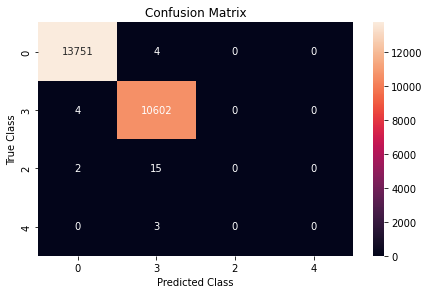

In [ ]:
X_test_cnn_1 = np.reshape(sample_test_0_3, (sample_test_0_3.shape[0],sample_test_0_3.shape[1],1))

label_test_0_3[np.where(label_test_0_3==0)] = 0
label_test_0_3[np.where(label_test_0_3==3)] = 1

y_pred = cnn_1.predict(X_test_cnn_1)
print(len(y_pred))

pred = []
for element in y_pred:
  if(element > 0.5):
    pred.append(1)
  else:
    pred.append(0)

####################################################
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(label_test_0_3, pred)
print(accuracy)

cm = confusion_matrix(label_test_0_3, pred)
print(cm)

import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
matrix = confusion_matrix(label_test_0_3, pred)

class_names = [0,3,2,4]
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index = class_names, columns = class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True,fmt=".0f")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()
#####################################################

In [ ]:
print(np.unique(pred, return_counts = True))

(array([0, 1]), array([13757, 10624]))


In [ ]:
predicted = []

for x in pred:
  if x == 0:
    predicted.append(0)
  else:
    predicted.append(3)

print(len(predicted))

24381


In [ ]:
############# Class 1 and Class 2

In [ ]:
for i in range(len(sample_test_1_2[0])):
  sample_test_1_2[:,i] = (sample_test_1_2[:,i] - mean_2[0,i]) / SD_2[0,i]

for row in sample_test_1_2:
  row[np.where(np.isnan(row))] = 0.0

<ipython-input-53-cb3e31c74c4f>:2: RuntimeWarning: invalid value encountered in true_divide
  sample_test_1_2[:,i] = (sample_test_1_2[:,i] - mean_2[0,i]) / SD_2[0,i]


(array([0, 1, 3, 4]), array([24565, 19467,     4,     1]))
1377/1377 [==============================] - 4s 3ms/step
0.9995685446329223
[[24556     9     0     0]
 [    5 19462     0     0]
 [    0     4     0     0]
 [    0     1     0     0]]


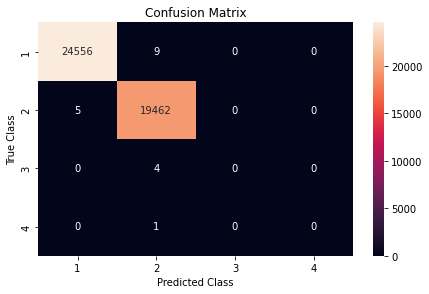

In [ ]:
X_test_cnn_2 = np.reshape(sample_test_1_2, (sample_test_1_2.shape[0],sample_test_1_2.shape[1],1))

label_test_1_2[np.where(label_test_1_2==1)] = 0
label_test_1_2[np.where(label_test_1_2==2)] = 1
print(np.unique(label_test_1_2, return_counts = True))

y_pred = cnn_2.predict(X_test_cnn_2)

pred = []
for element in y_pred:
  if(element > 0.5):
    pred.append(1)
  else:
    pred.append(0)

####################################################
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(label_test_1_2, pred)
print(accuracy)

cm = confusion_matrix(label_test_1_2, pred)
print(cm)

import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
matrix = confusion_matrix(label_test_1_2, pred)

class_names = [1,2,3,4]
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index = class_names, columns = class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True,fmt=".0f")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()
#####################################################

In [ ]:
print(np.unique(pred, return_counts = True))

(array([0, 1]), array([24561, 19476]))


In [ ]:
for x in pred:
  if x == 0:
    predicted.append(1)
  else:
    predicted.append(2)

print(len(predicted))

68418


In [ ]:
##### Class 5 and Class 6

In [ ]:
for i in range(len(sample_test_5_6[0])):
  sample_test_5_6[:,i] = (sample_test_5_6[:,i] - mean_3[0,i]) / SD_3[0,i]
  
for row in sample_test_5_6:
  row[np.where(np.isnan(row))] = 0.0
  row[np.where(np.isinf(row))] = 0.0

<ipython-input-58-9f53d4b1c6f2>:2: RuntimeWarning: divide by zero encountered in true_divide
  sample_test_5_6[:,i] = (sample_test_5_6[:,i] - mean_3[0,i]) / SD_3[0,i]
<ipython-input-58-9f53d4b1c6f2>:2: RuntimeWarning: invalid value encountered in true_divide
  sample_test_5_6[:,i] = (sample_test_5_6[:,i] - mean_3[0,i]) / SD_3[0,i]


In [ ]:
np.where(np.isinf(sample_test_5_6))

(array([], dtype=int64), array([], dtype=int64))

0.9850746268656716
[[43  1]
 [ 0 23]]


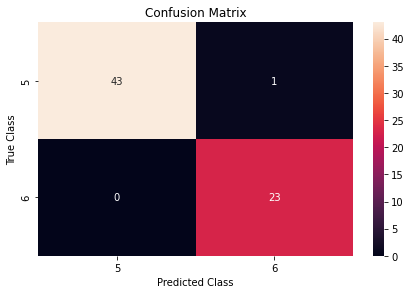

In [ ]:
label_test_5_6[np.where(label_test_5_6==5)] = 0
label_test_5_6[np.where(label_test_5_6==6)] = 1

pred = tree.predict(sample_test_5_6)


####################################################
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(label_test_5_6, pred)
print(accuracy)

cm = confusion_matrix(label_test_5_6, pred)
print(cm)

import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
matrix = confusion_matrix(label_test_5_6, pred)

class_names = [5,6]
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index = class_names, columns = class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True,fmt=".0f")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()
#####################################################

In [ ]:
print(np.unique(pred, return_counts = True))

(array([0., 1.]), array([43, 24]))


In [ ]:
for x in pred:
  if x == 0:
    predicted.append(5)
  else:
    predicted.append(6)

print(len(predicted))

68485


In [ ]:
######## Class 4

In [ ]:
x_train_data_4 = BFA.iloc[:,:-1]
y_train_data_4 = BFA.iloc[:,-1]

classifier = KNeighborsClassifier()

knn = classifier.fit(x_train_data_4, y_train_data_4)
y_pred = knn.predict(class_4)

print(len(y_pred))

for x in y_pred:
    predicted.append(4)

print(len(predicted))

287
68772


In [ ]:
##### Class 7

In [ ]:
x_train_data_5 = U2R.iloc[:,:-1]
y_train_data_5 = U2R.iloc[:,-1]

classifier = KNeighborsClassifier()

knn = classifier.fit(x_train_data_5, y_train_data_5)
y_pred = knn.predict(class_7)

print(len(y_pred))

for x in y_pred:
    predicted.append(7)

print(len(predicted))

6
68778


In [ ]:
#######################

0.9990694698886272


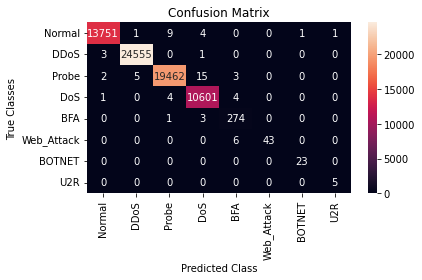

In [ ]:
print(accuracy_score(label_test,predicted))
matrix = confusion_matrix(label_test,predicted)
class_names = ['Normal', 'DDoS', 'Probe', 'DoS', 'BFA', 'Web_Attack', 'BOTNET', 'U2R']
dataframe = pd.DataFrame(data = matrix, index = class_names, columns = class_names)
sns.heatmap(dataframe, annot=True, fmt='.0f')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Classes")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_test,predicted, target_names=class_names, digits = 6))

              precision    recall  f1-score   support

      Normal   0.999564  0.998838  0.999201     13767
        DDoS   0.999756  0.999837  0.999796     24559
       Probe   0.999281  0.998717  0.998999     19487
         DoS   0.997835  0.999152  0.998493     10610
         BFA   0.954704  0.985612  0.969912       278
  Web_Attack   1.000000  0.877551  0.934783        49
      BOTNET   0.958333  1.000000  0.978723        23
         U2R   0.833333  1.000000  0.909091         5

    accuracy                       0.999069     68778
   macro avg   0.967851  0.982463  0.973625     68778
weighted avg   0.999079  0.999069  0.999069     68778

